In [1]:
from orion.data import load_signal, load_anomalies

from src.m2ad import M2AD

In [2]:
signal = 'S-1'
data = load_signal(f'multivariate/{signal}-train')

time_column = 'timestamp'
sensor_columns = ['0']
covariate_columns = list(map(str, range(1, len(data.columns)-1)))

data.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,1222819200,-0.366359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1222840800,-0.394108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1222862400,0.403625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1222884000,-0.362759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1222905600,-0.370746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
model = M2AD(dataset='SMAP', entity=signal, 
             time_column=time_column, 
             sensors=sensor_columns, 
             covariates=covariate_columns, 
             epochs=10, 
             error_name='area',
             feature_range=(0, 1))

In [4]:
model.fit(data, tolerance=5)

Epoch 1/10: train loss  0.1063 | val loss  0.1061.
Epoch 2/10: train loss  0.1022 | val loss  0.1052.
Epoch 3/10: train loss  0.1000 | val loss  0.1050.
Epoch 4/10: train loss  0.1000 | val loss  0.1022.
Epoch 5/10: train loss  0.0979 | val loss  0.1018.
Epoch 6/10: train loss  0.0969 | val loss  0.1000.
Epoch 7/10: train loss  0.0966 | val loss  0.1014.
Epoch 8/10: train loss  0.0956 | val loss  0.1006.
Epoch 9/10: train loss  0.0972 | val loss  0.1037.
Epoch 10/10: train loss  0.0957 | val loss  0.0998.


In [5]:
test = load_signal(f'multivariate/{signal}-test')

anomalies = model.detect(test)

In [6]:
anomalies

,dataset,entity,start,end,score
0,SMAP,S-1,1.398276e+09,1.405771e+09,0.045055


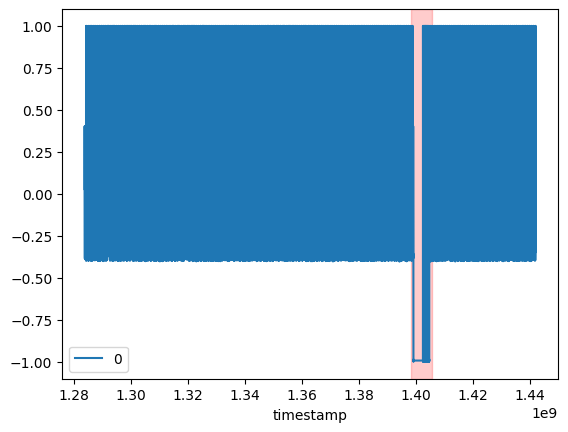

In [7]:
import matplotlib.pyplot as plt

anomaly = anomalies.iloc[0]

test.plot(x='timestamp', y='0')
plt.axvspan(anomaly['start'], anomaly['end'], color='r', alpha=0.2)